# 1. FCNN 이용하여 MINST 분류하기 

## Import modules

In [15]:
import tensorflow as tf

## 데이터 불러오기

In [16]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [17]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## 네트워크 구조 정의

#### ㅇ FCNN 이므로 입력 데이터를 쭉 나열해야 하므로 Flatten 함수를 사용함.

In [18]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')])

## Keras 모델 Compile

In [19]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

## 학습 수행

In [25]:
EPOCHS = 50
BATCH_SIZE = 1024

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [27]:
es = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [28]:
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[es, mc], validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
59392/60000 [============================>.] - ETA: 0s - loss: 0.1925 - accuracy: 0.9453
Epoch 00001: val_accuracy improved from -inf to 0.95410, saving model to best_model.h5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1920 - accuracy: 0.9455 - val_loss: 0.1580 - val_accuracy: 0.9541
Epoch 2/200
59392/60000 [============================>.] - ETA: 0s - loss: 0.1751 - accuracy: 0.9501
Epoch 00002: val_accuracy improved from 0.95410 to 0.95790, saving model to best_model.h5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1751 - accuracy: 0.9500 - val_loss: 0.1450 - val_accuracy: 0.9579
Epoch 3/200
59392/60000 [============================>.] - ETA: 0s - loss: 0.1608 - accuracy: 0.9545
Epoch 00003: val_accuracy improved from 0.95790 to 0.96180, saving model to best_model.h5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1607 - accuracy: 0.9545 - val_lo

59392/60000 [============================>.] - ETA: 0s - loss: 0.0534 - accuracy: 0.9839
Epoch 00026: val_accuracy did not improve from 0.97900
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0537 - accuracy: 0.9838 - val_loss: 0.0720 - val_accuracy: 0.9779
Epoch 27/200
59392/60000 [============================>.] - ETA: 0s - loss: 0.0519 - accuracy: 0.9850
Epoch 00027: val_accuracy did not improve from 0.97900
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0519 - accuracy: 0.9850 - val_loss: 0.0730 - val_accuracy: 0.9783
Epoch 28/200
59392/60000 [============================>.] - ETA: 0s - loss: 0.0510 - accuracy: 0.9848
Epoch 00028: val_accuracy did not improve from 0.97900
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0510 - accuracy: 0.9848 - val_loss: 0.0720 - val_accuracy: 0.9786
Epoch 29/200
59392/60000 [============================>.] - ETA: 0s - loss: 0.0490 - accuracy: 0.9852
Epoch 00029: val_accuracy 

## 학습 결과 테스트

In [29]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.0716 - accuracy: 0.9793


[0.0716378364031436, 0.9793]

## 성능 그래프

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
x_range = range(1,len(history.history['accuracy'])+1)

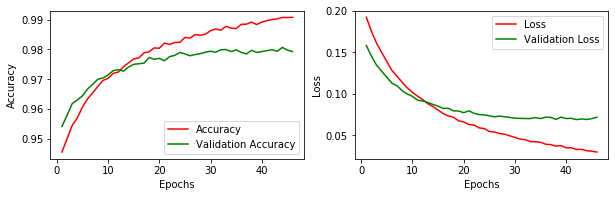

In [52]:
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.plot(x_range, history.history['accuracy'], color='red', label='Accuracy')
plt.plot(x_range, history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color='red', label='Loss')
plt.plot(x_range, history.history['val_loss'], color='green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 실전 테스트

In [59]:
x_test[0].shape

(28, 28)

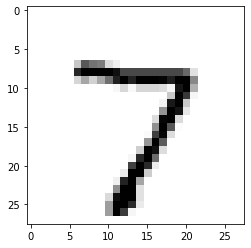

The Answer is  [7]


In [58]:
n = 0
plt.imshow(x_test[n], cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape(1,28,28)))

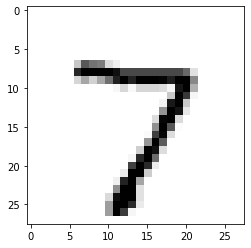

The Answer is  [[1.8621053e-07 1.3238423e-09 1.9044703e-07 2.6524489e-04 2.0264474e-11
  4.5020727e-08 2.5584602e-12 9.9972969e-01 1.5029451e-07 4.5358424e-06]]


In [60]:
n = 0
plt.imshow(x_test[n], cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict(x_test[n].reshape(1,28,28)))